# Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import cv2

2024-04-19 12:00:01.442916: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 12:00:03.999057: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
currentPath = os.getcwd()+"/dataset/train"

In [3]:
data = []
labels = []
classes = 43

for i in os.listdir(currentPath):
    dir = currentPath + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (64,64), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 64, 64, 3) (39209,)


In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 64, 64, 3) (7842, 64, 64, 3) (31367,) (7842,)


In [6]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Data Visualization

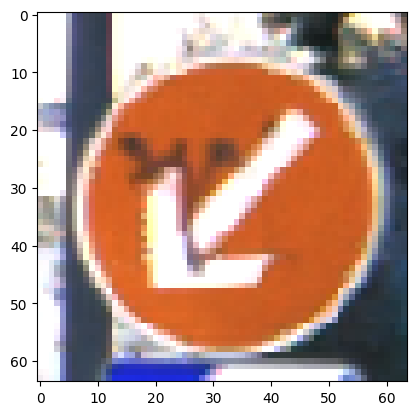

In [7]:
plt.imshow(X_train[0])

Text(0, 0.5, 'Number of images')

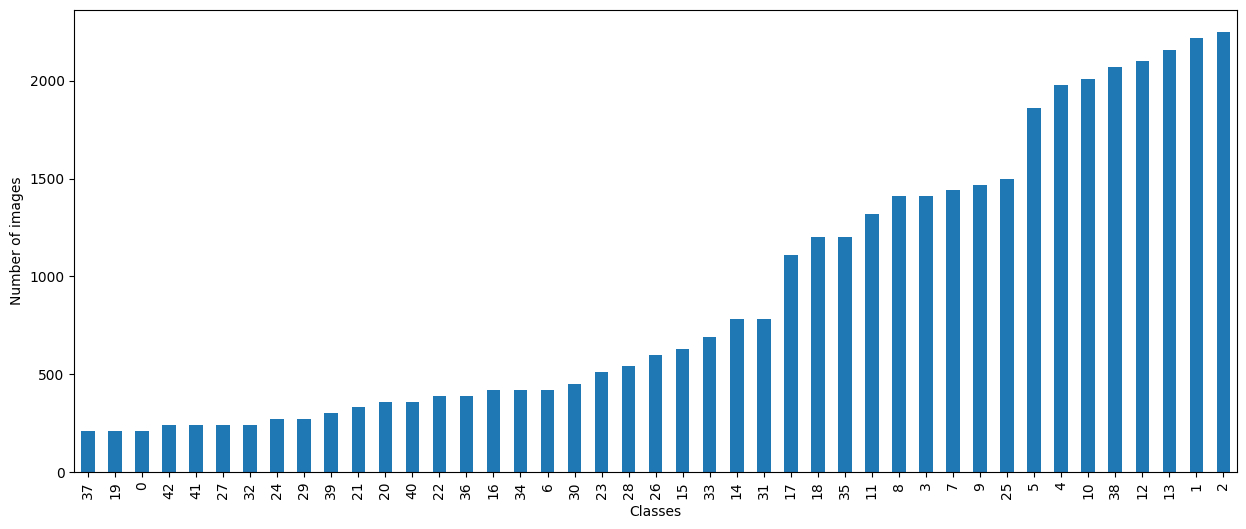

In [8]:
# number of images in each class
data_dic = {}
for folder in os.listdir(currentPath):
    data_dic[folder] = len(os.listdir(currentPath + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

# Create CNN Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [10]:
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

/home/lenovo/Documents/TSReco_CNN/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,454,091 (9.36 MB)

 Trainable params: 2,454,091 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [54]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 422s 854ms/step - accuracy: 0.0498 - loss: 6.3308 - val_accuracy: 0.4754 - val_loss: 2.2859
Epoch 2/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 416s 847ms/step - accuracy: 0.5743 - loss: 1.6227 - val_accuracy: 0.9179 - val_loss: 0.3796
Epoch 3/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 447s 911ms/step - accuracy: 0.8405 - loss: 0.5547 - val_accuracy: 0.9476 - val_loss: 0.1982
Epoch 4/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 476s 858ms/step - accuracy: 0.8953 - loss: 0.3543 - val_accuracy: 0.9657 - val_loss: 0.1352
Epoch 5/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 434s 843ms/step - accuracy: 0.9154 - loss: 0.2940 - val_accuracy: 0.9713 - val_loss: 0.1095
Epoch 6/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 408s 831ms/step - accuracy: 0.9247 - loss: 0.2456 - val_accuracy: 0.9739 - val_loss: 0.0950
Epoch 7/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 402s 819ms/step - accuracy: 0.9264 - loss: 0.2332 - val_accuracy: 0.9772 - val_loss: 0.0795
Epoch 8/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 416s 846ms/step - accuracy: 0.9363 -

In [12]:
from tensorflow.keras.models import load_model

In [13]:
model = load_model('my_model.h5')

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.04968682676553726
Test accuracy 0.9863555431365967


In [15]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

  8/246 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step

246/246 ━━━━━━━━━━━━━━━━━━━━ 34s 137ms/step


In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.99      0.97      0.98       455
           2       1.00      0.95      0.97       450
           3       0.97      0.98      0.98       313
           4       0.99      0.98      0.99       411
           5       0.94      0.97      0.96       367
           6       0.99      1.00      0.99        71
           7       0.96      0.99      0.98       266
           8       0.96      0.99      0.98       274
           9       0.98      1.00      0.99       277
          10       1.00      1.00      1.00       407
          11       0.99      0.99      0.99       284
          12       0.99      1.00      1.00       369
          13       1.00      1.00      1.00       433
          14       1.00      0.99      1.00       151
          15       0.99      1.00      1.00       111
          16       1.00      0.98      0.99        92
          17       1.00    

In [17]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.9863555215506249

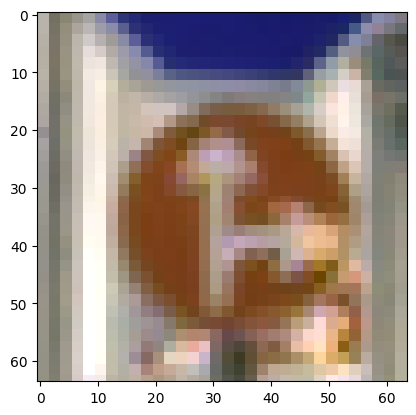

In [18]:
plt.imshow(X_test[31])

In [19]:
X_test[31][np.newaxis].shape

(1, 64, 64, 3)

In [20]:
np.argmax(model.predict(X_test[31][np.newaxis]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


36

In [21]:
#dictionary to label all traffic signs class.
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

# Testing

In [22]:
test_path = os.getcwd()+'/dataset/test'

In [23]:
test_data = []
test_class = []

for j in os.listdir(test_path):
    img_path = test_path+'/'+j
    img = cv2.imread(img_path,-1)
    img = cv2.resize(img, (64,64), interpolation = cv2.INTER_NEAREST)
    test_data.append(img)
    test_class.append(j)
        
test_data = np.array(test_data)

In [24]:
predictions = np.argmax(model.predict(test_data),axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 50s 126ms/step


# Test Result

In [25]:
import random

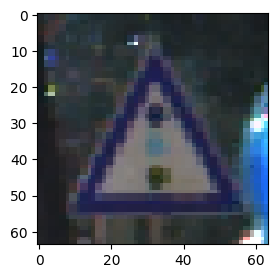

Traffic signals


In [26]:
r = random.randint(0,12630)

plt.figure(figsize=(3,3))
plt.imshow(test_data[r])
plt.show()
print(classes[predictions[r]])

In [27]:
test_labels = pd.read_csv('dataset/test.csv',usecols=['ClassId', 'Path'])

In [28]:
test_labels = np.array(test_labels)

In [29]:
test_class = np.array(['Test/'+i for i in test_class])

In [30]:
test_labels

array([[16, 'Test/00000.png'],
       [1, 'Test/00001.png'],
       [38, 'Test/00002.png'],
       ...,
       [6, 'Test/12627.png'],
       [7, 'Test/12628.png'],
       [10, 'Test/12629.png']], dtype=object)

In [31]:
test_pred = []

for i in range(len(predictions)):
    obj = [predictions[i],test_class[i]]
    test_pred.append(obj)


In [32]:
test_pred = np.array(test_pred)

test_pred = pd.DataFrame(test_pred, columns=['ClassId', 'Path'])

test_pred = np.array(test_pred.sort_values(by='Path'))

test_pred = [int(i) for i in test_pred[:,0]]

In [33]:
test_labels = list(test_labels[:,0])

In [34]:
accuracy_score(test_pred,test_labels)

0.9480601741884402

# Check user input image

In [35]:
usr_images = []
for i in os.listdir('usr_images/'):
    img = cv2.imread('usr_images/'+i,-1)
    img = cv2.resize(img, (64,64), interpolation = cv2.INTER_NEAREST)
    usr_images.append(img)

In [36]:
usr_images = np.array(usr_images)
usr_images.shape

(3, 64, 64, 3)

In [37]:
usr_pred = np.argmax(model.predict(usr_images),axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Speed limit (20km/h)


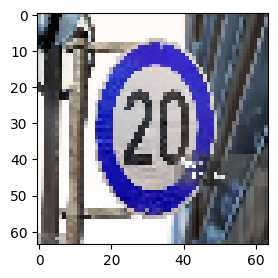

Go straight or left


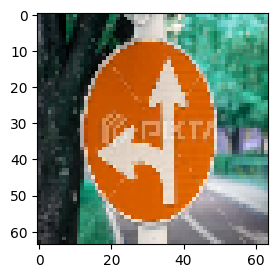

Right-of-way at intersection


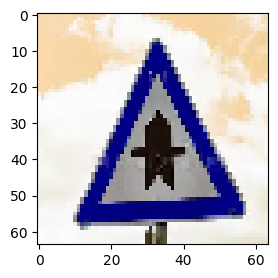

In [38]:
for i in range(len(usr_images)):
    print(classes[usr_pred[i]])
    plt.figure(figsize=(3,3))
    plt.imshow(usr_images[i])
    plt.show()
